On importe les librairies nécessaires

In [1]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from selenium.webdriver.edge.options import Options
import time
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

### Récupérer les données

On spécifie le chemin vers msedgedriver

In [2]:
msedgedriver_path = "C:\\Users\\Irish\\Downloads\\edgedriver_win32\\msedgedriver.exe"
service = Service(msedgedriver_path)

On configure les options de Edge

In [3]:
options = Options()
options.add_argument("--incognito")
options.add_argument("--disable-notifications")

On crée une instance du navigateur Edge, avec les options spécifiées au-dessus

In [4]:
browser = webdriver.Edge(service=service, options=options)

On doit ensuite se connecter au compte Yahoo Finance pour accéder au screener des ETFs du monde entier

In [5]:
path = "https://login.yahoo.com/config/login?.src=finance&.intl=us&.lang=en-US&.done=https%3A%2F%2Ffinance.yahoo.com%2Fquotes%2Flogin%2Fview%2Fv1%2F"
browser.get(path)

On remplit le formulaire de connexion

In [6]:
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "username"))).send_keys("irishrugbyman@gmail.com")
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "signin"))).click()
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "password"))).send_keys("F$Pi2YahooFinance20")
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.ID, "login-signin"))).click()

On va sur la page qui contient le screener

In [7]:
url = "https://finance.yahoo.com/screener/1745ba28-6f7f-4504-a2db-9a98b89ff912?offset=0&count=100"
browser.get(url)

On attend que le tableau charge, puis on récupère le contenu HTML de la page

In [8]:
time.sleep(5)
content = browser.page_source

On utilise panda pour récupérer le tableau grâce au contenu HTML

In [9]:
dfs = pd.read_html(content)
df = dfs[0]

On ferme le navigateur

In [10]:
browser.quit()

On récupère la colonne "Symbols" du tableau 

In [11]:
symbols = df["Symbol"].tolist()

On utilise yfinance pour télécharger les données des ETFs

In [12]:
etf_data = yf.download(symbols, start='2023-01-01')['Adj Close']

[*********************100%%**********************]  100 of 100 completed


On peut visualiser nos données

In [13]:
etf_data.head(5)

,1675.T,1676.T,AIRR,ALAU.L,BYBG.L,BYBU.L,CALF,CBVSO.SW,CEU2.L,CNRG,...,XLE.MX,XMBD.L,XMHQ,XMVM,XMWD.L,XSD,XSMO,XSVM,XUEN.L,ZPAL.SW
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1694.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,43.971085,13.603,19701.0,236.274994,35.188213,123.699997,79.404999,79.909218,...,1632.040039,39.889999,68.001839,42.812134,78.595001,164.447372,45.993237,44.806648,43.259899,485.350006
2023-01-04,21295.0,17955.0,44.190697,13.603,19905.0,239.524994,35.524754,123.800003,80.904999,82.313843,...,1640.000000,39.474998,69.035187,43.354683,79.430000,167.998474,46.052643,45.172615,42.624508,495.000000
2023-01-05,21855.0,17955.0,43.392128,13.897,20002.5,238.125000,35.217907,124.000000,80.264999,80.346428,...,1650.290039,40.595001,68.280045,43.167255,78.544998,164.846375,45.636776,44.826427,43.114391,485.000000
2023-01-06,21840.0,17955.0,44.609943,14.331,20255.0,243.800003,36.227524,124.860001,81.800003,82.820618,...,1693.040039,42.145000,69.919479,44.380600,79.870003,172.427353,46.676445,45.934231,44.511276,497.000000


### Créer un portefeuille aléatoire

On crée une fonction qui va prendre en argument la liste des symboles, les données, et le nombre d'ETFs présents dans notre portefeuille

In [14]:
def random_portfolio(symbols_list,data,n):
    sample = random.sample(symbols_list,n)
    return data[sample]

In [34]:
ran_port = (random_portfolio(symbols,etf_data,10))
ran_port = ran_port.bfill()

On appelle ensuite la fonction avec la liste "symbols", "etf_data" et 10 ETFs souhaités

On fait ensuite face à un problème, que faire des jours où l'on n'a pas de données ?
→ La solution que j'ai privilégiée pour l'instant est de remplir les données en prenant la prochaine donnée disponible dans la liste : on passe d'une case qui a la valeur NaN (valeur non existante) à une case qui prend la valeur non NaN suivante
J'ai fait cette hypothèse pour l'instant pour éviter les chutes soudaines des cours d'un ETF à la valeur 0

In [16]:
ran_port = ran_port.bfill()

On peut visualiser notre portefeuille

In [17]:
ran_port

,EES,VIOV,GENDES.SW,VB.MX,SPSM,MDYV,IJJ,PSCD,ITB.MX,INDS
Date,,,,,,,,,,
2023-01-02,42.365814,77.724449,15.244000,3551.110107,36.531876,63.799332,99.264442,78.558266,1162.800049,35.454346
2023-01-03,42.365814,77.724449,15.244000,3551.110107,36.531876,63.799332,99.264442,78.558266,1191.400024,35.454346
2023-01-04,43.041443,79.255341,15.436000,3551.110107,36.987164,65.023201,101.040016,80.758331,1191.400024,36.265831
2023-01-05,42.584400,78.484955,15.424000,3543.110107,36.670444,64.470490,100.231148,80.718689,1191.400024,35.401211
2023-01-06,43.577969,80.381271,15.648000,3543.110107,37.521633,66.148376,102.894501,82.661095,1191.400024,36.091942
...,...,...,...,...,...,...,...,...,...,...
2023-12-11,46.570000,83.010002,16.290001,3220.000000,39.490002,69.459999,107.930000,96.379997,1629.430054,38.270000
2023-12-12,46.230000,82.809998,16.348000,3220.000000,39.410000,69.190002,107.610001,95.480003,1629.430054,38.329201
2023-12-13,47.730000,85.629997,16.364000,3220.000000,40.700001,71.120003,110.660004,98.570000,1629.430054,39.770000


### Matrice de corrélation

On crée une fonction qui prend enargument un portefeuille quelconque

In [18]:
def portfolio_corr_matrix(portfolio):
    
    # On utilise la fonction .corr() pour obtenir la matrice de corrélation de notre portefeuille
    correlation_matrix = portfolio.corr()
    
    # On masque la partie supérieure droite pour éviter que la matrice soit illisible
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # On affiche la matrice sous la forme d'une "heatmap", qui facilite la compréhension grâce à des couleurs
    plt.figure(figsize=(25, 25))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
    plt.title('ETF Correlation Heatmap')

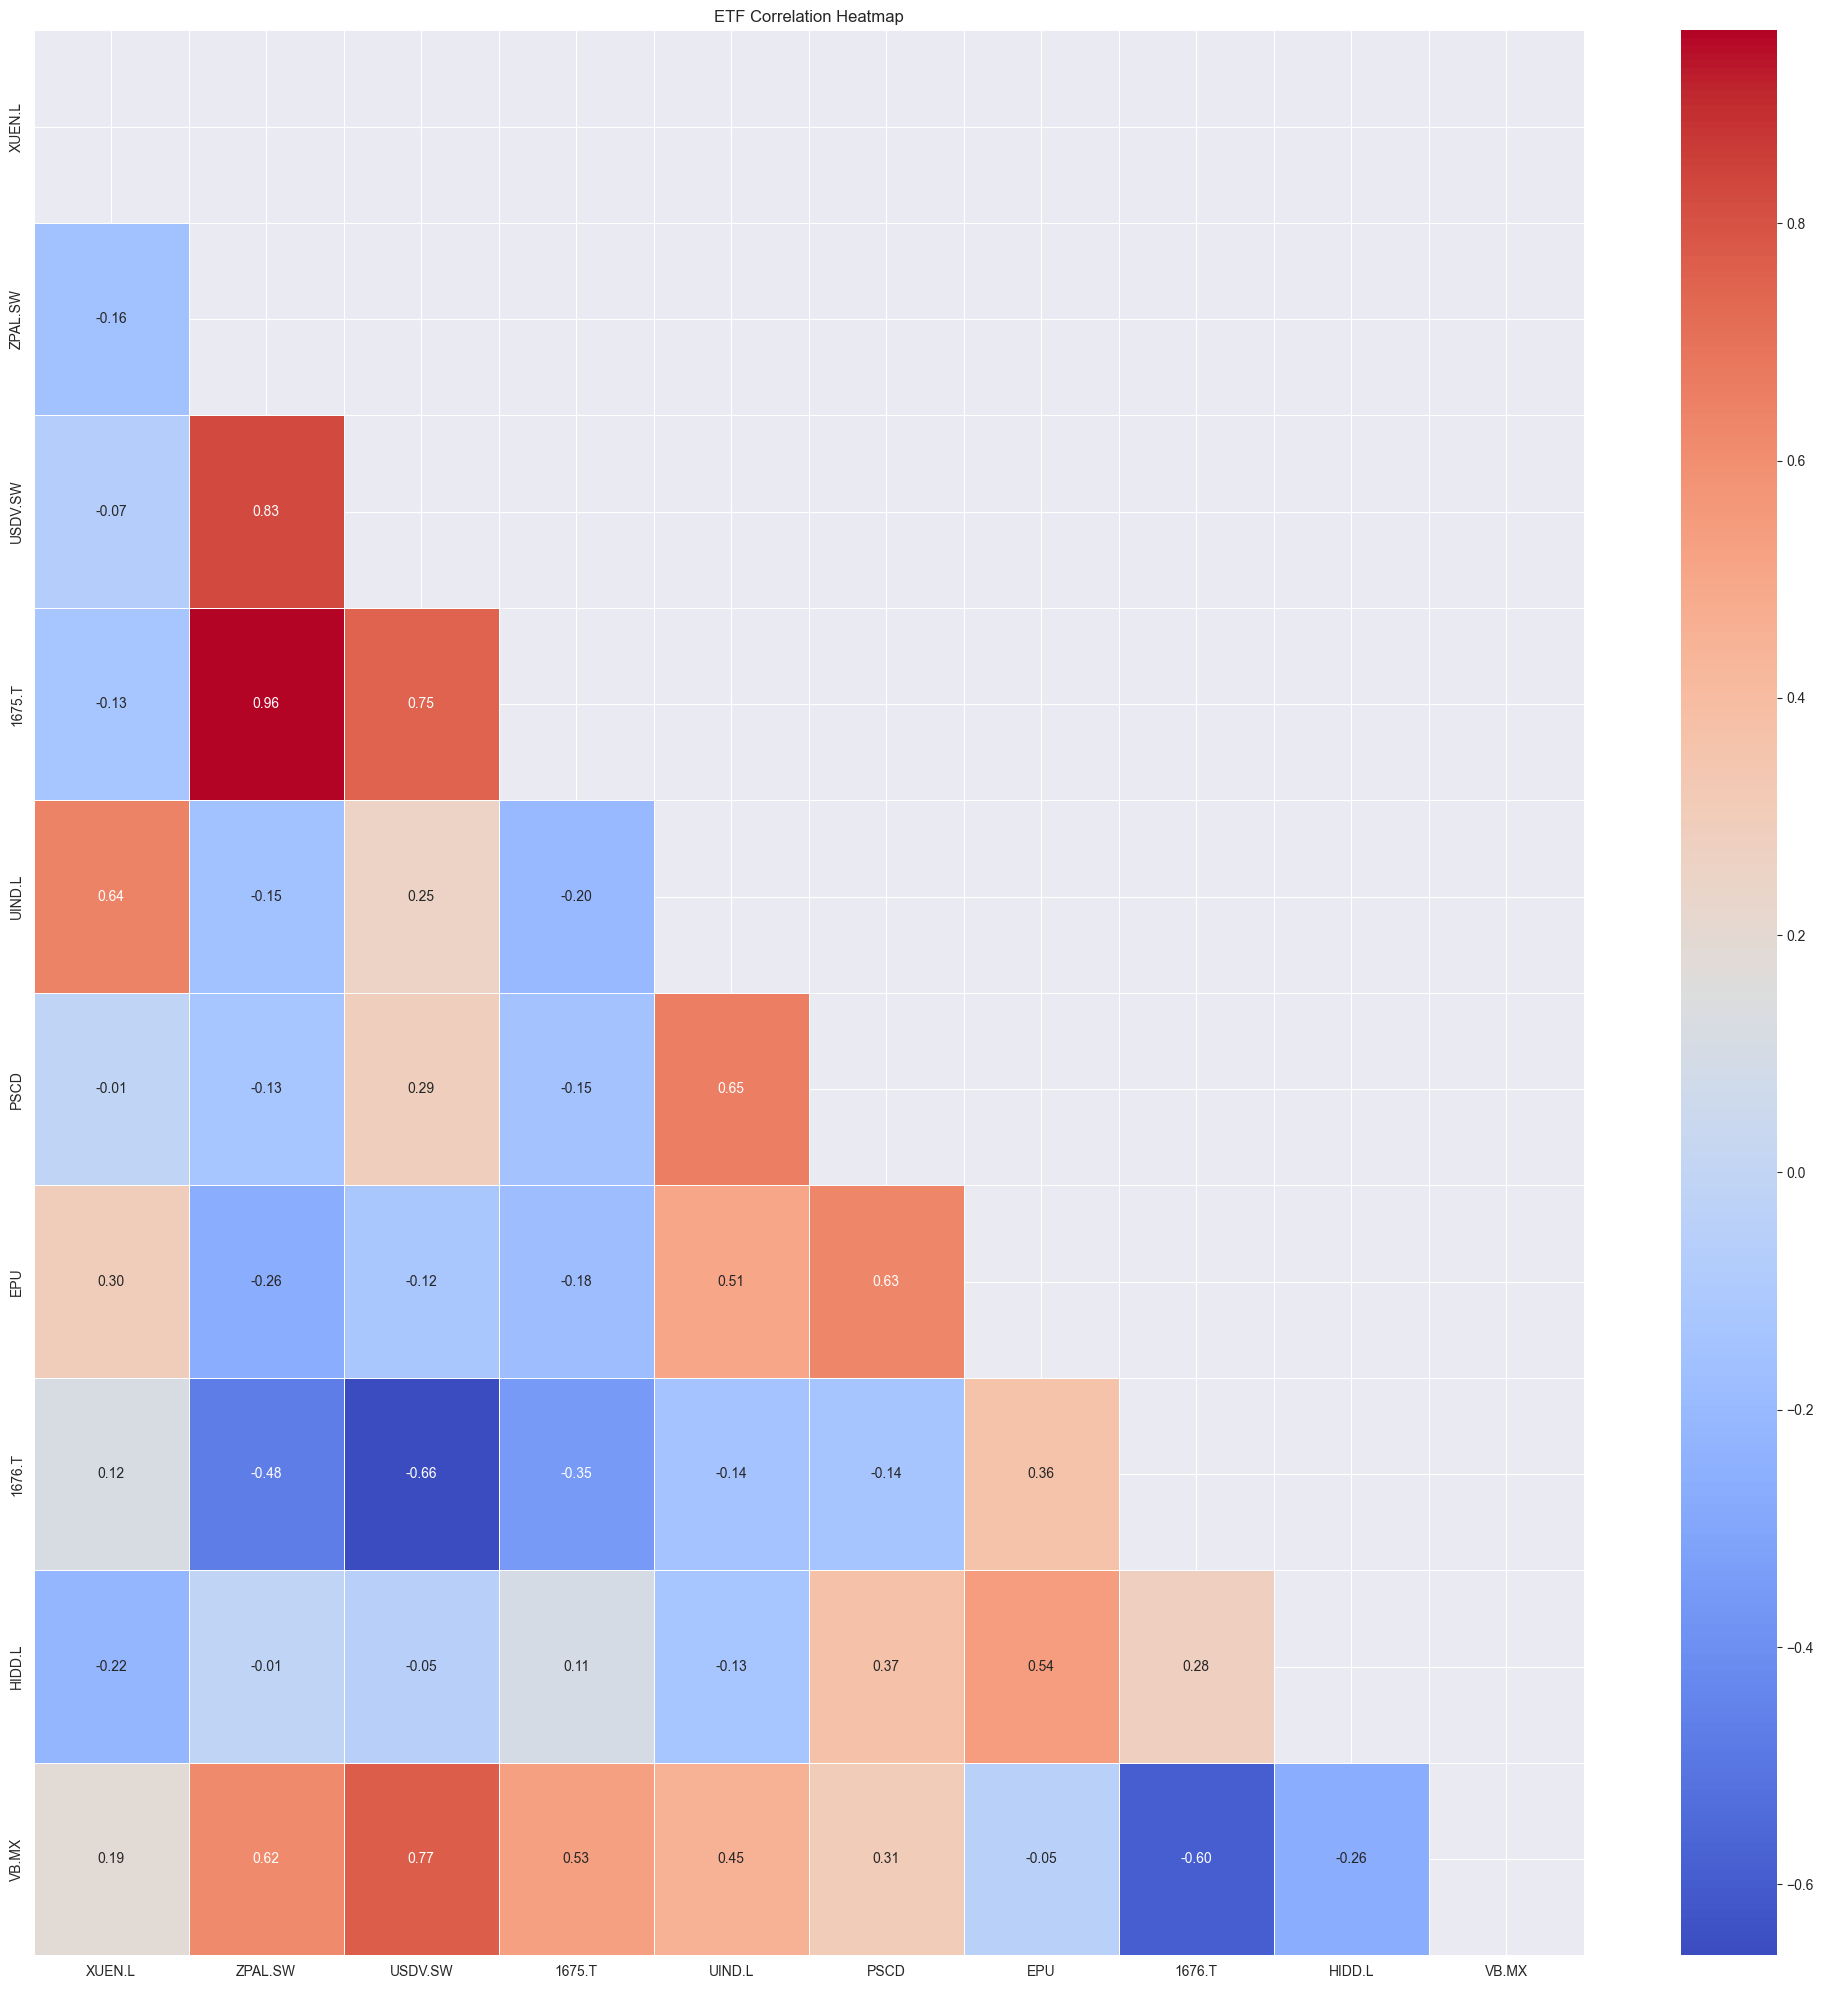

In [39]:
portfolio_corr_matrix(ran_port)

### Afficher la performance individuelle de chaque ETF du portefeuille

On va créer une fonction qui prend en argument un portefeuille quelconque

In [19]:
def portfolio_individual_plot(portfolio):
    
    # On récupère les symboles des ETFs présents dans le portefeuille
    symbols = list(portfolio.columns)
    
    # On crée le graphique
    plt.figure(figsize=(25, 15))
    
    # On parcourt les symboles de la liste, puis on ajoute chaque courbe au graphique
    for ticker in symbols:
        portfolio[f"{ticker}"].plot(label=ticker)
    
    # On donne un titre et une légende au graphe
    plt.title("ETFs Time Series Comparison")
    plt.legend()

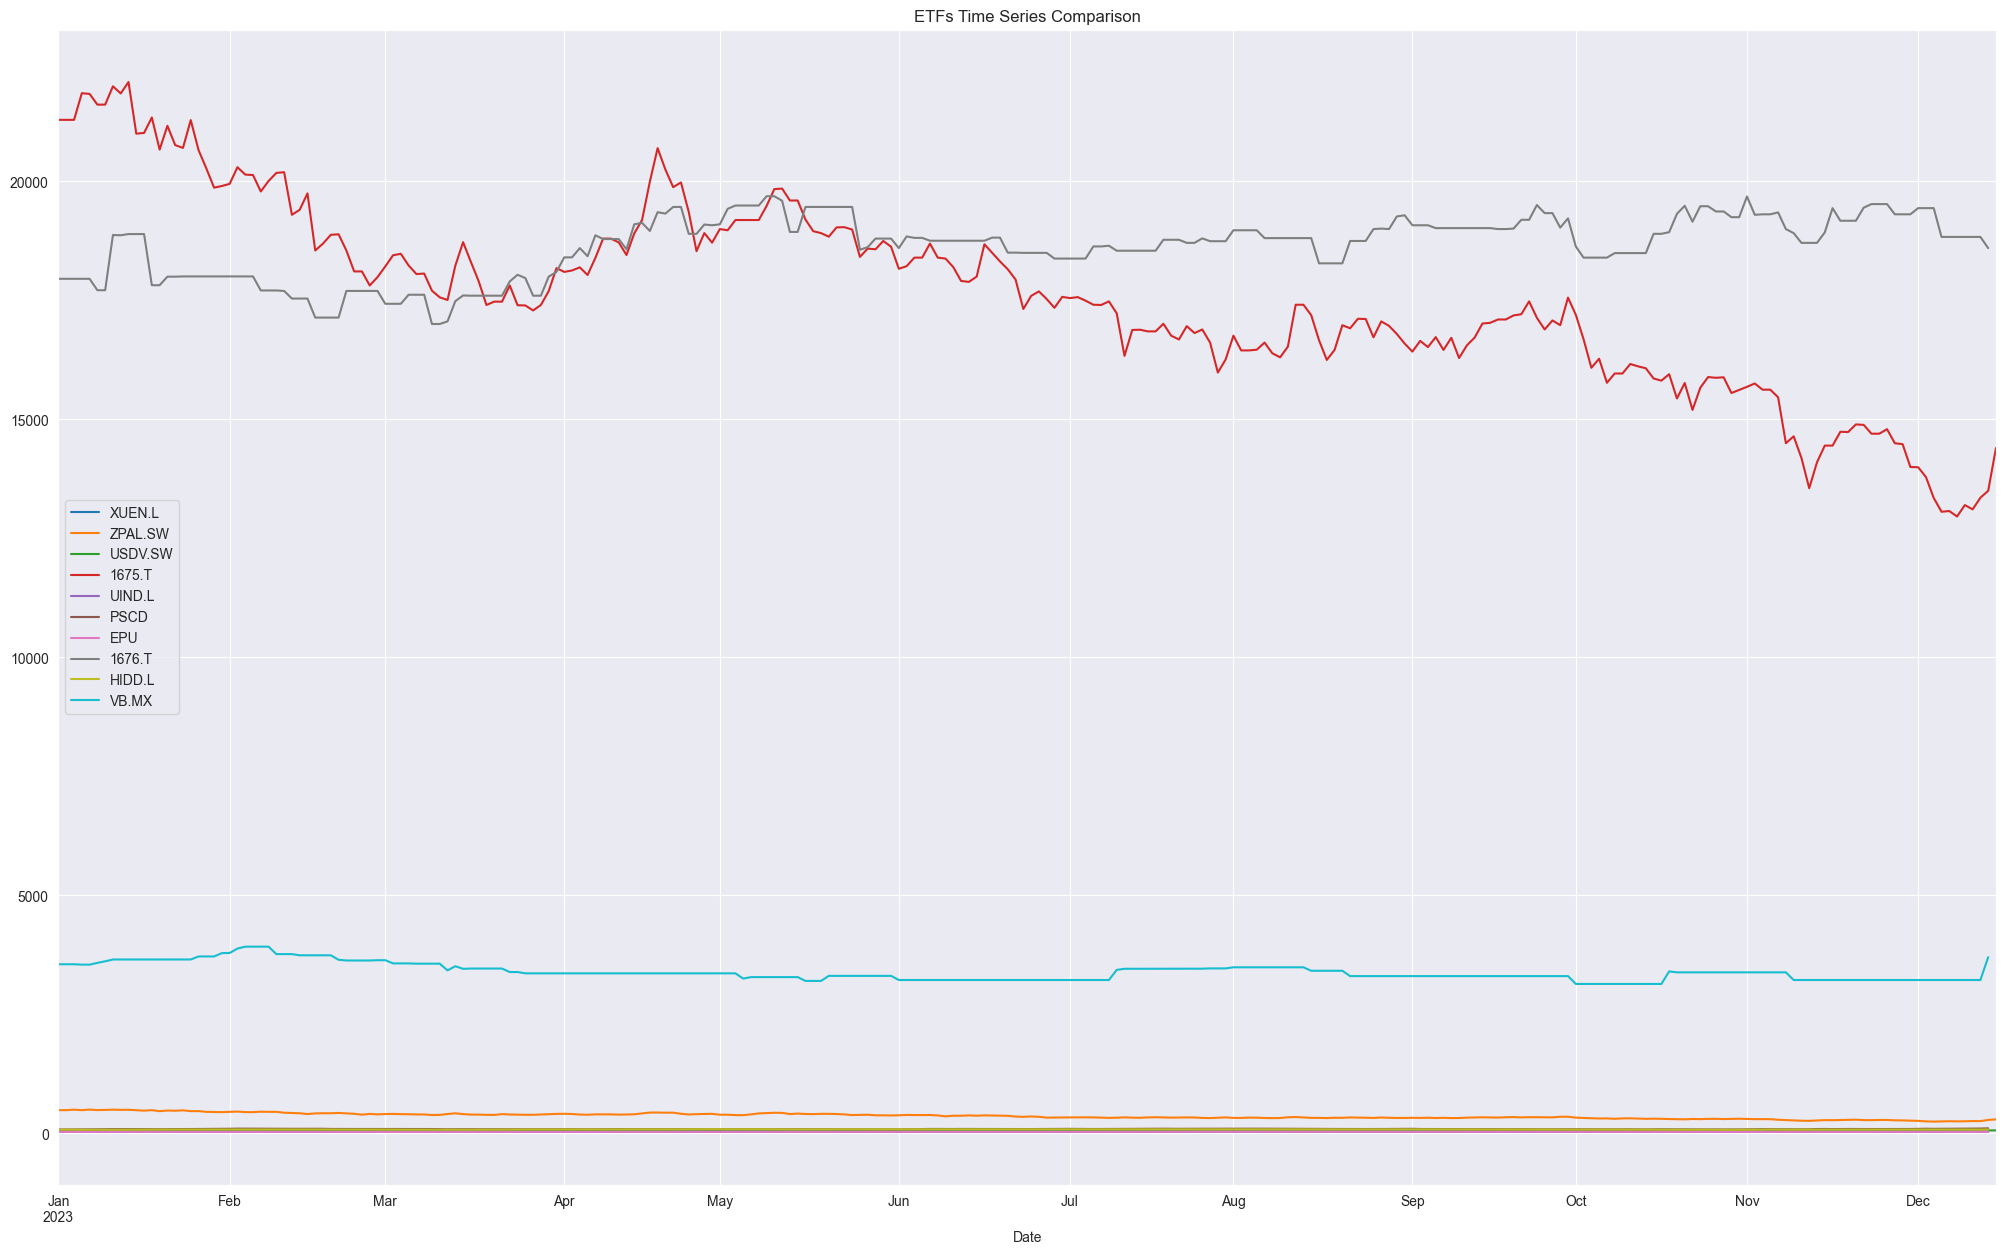

In [38]:
portfolio_individual_plot(ran_port)

### Trouver les ETFs les plus/moins corrélés

On crée une fonction qui prend en argument un portefeuille quelconque, ainsi que l'ordre de tri (décroissant ou croissant)
On a donné d'office la valeur True à la variable ordre, cela veut dire que si l'on ne précise pas l'ordre, il sera croissant par défaut. Si on veut qu'il soit décroissant, on doit appeler la fonction avec False pour la variable order.

In [20]:
def portfolio_top_corr(portfolio,order = True):
    
    # On récupère les corrélations, puis on les met sous forme de liste et non de matrice
    correlation_values = (portfolio.corr()).unstack()
    
    # On trie la liste, dans l'ordre qui a été décidé au moment de l'appel de la fonction
    sorted_correlation_values = correlation_values[correlation_values != 1.0].sort_values(ascending=order)
    
    # On supprime les corrélations en double (pour éviter d'avoir la corrélation entre A et B, puis celle entre B et A) 
    top_correlations = sorted_correlation_values.drop_duplicates()
    
    return top_correlations

In [37]:
portfolio_top_corr(ran_port)

USDV.SW  1676.T    -0.659902
1676.T   VB.MX     -0.596197
ZPAL.SW  1676.T    -0.476003
1676.T   1675.T    -0.351588
ZPAL.SW  EPU       -0.264394
VB.MX    HIDD.L    -0.264244
XUEN.L   HIDD.L    -0.216475
UIND.L   1675.T    -0.203175
1675.T   EPU       -0.179582
XUEN.L   ZPAL.SW   -0.155958
UIND.L   ZPAL.SW   -0.153697
1675.T   PSCD      -0.151115
UIND.L   1676.T    -0.140951
1676.T   PSCD      -0.137172
1675.T   XUEN.L    -0.132187
ZPAL.SW  PSCD      -0.129732
UIND.L   HIDD.L    -0.127645
EPU      USDV.SW   -0.118883
USDV.SW  XUEN.L    -0.065806
HIDD.L   USDV.SW   -0.051805
EPU      VB.MX     -0.051037
ZPAL.SW  HIDD.L    -0.010975
PSCD     XUEN.L    -0.010285
HIDD.L   1675.T     0.106108
XUEN.L   1676.T     0.117335
VB.MX    XUEN.L     0.185126
UIND.L   USDV.SW    0.254447
1676.T   HIDD.L     0.283721
PSCD     USDV.SW    0.289478
EPU      XUEN.L     0.296343
VB.MX    PSCD       0.305778
EPU      1676.T     0.364873
PSCD     HIDD.L     0.371646
VB.MX    UIND.L     0.450087
EPU      UIND.

### Performance du portefeuille avec poids aléatoires

On crée une fonction qui prend en argument un portefeuille quelconque

In [21]:
def portfolio_performance(portfolio):
    
    # On calcule les rendements
    returns = portfolio.pct_change()
    
    # On définit les alphas qui contrôlent la distribution de Dirichlet et, par conséquent, les poids aléatoires générés pour votre portefeuille.
    alphas = .05*np.ones(returns.shape[1])
    
    # On crée des poids aléatoires qui suivent une distribution de Dirichlet (somme des poids égale à 1)
    random_weights  = np.random.dirichlet(alphas, size=1)
    
    # On effectue une multiplication matricielle entre les rendements (après le remplacement des valeurs manquantes) et les poids aléatoires (random_weights)
    plt.plot(returns.fillna(0).dot(random_weights.T).add(1).cumprod().sub(1), color='r')
    plt.title('Random Portfolio Performance')
    plt.xlabel('Time (days)')
    plt.ylabel('Return')

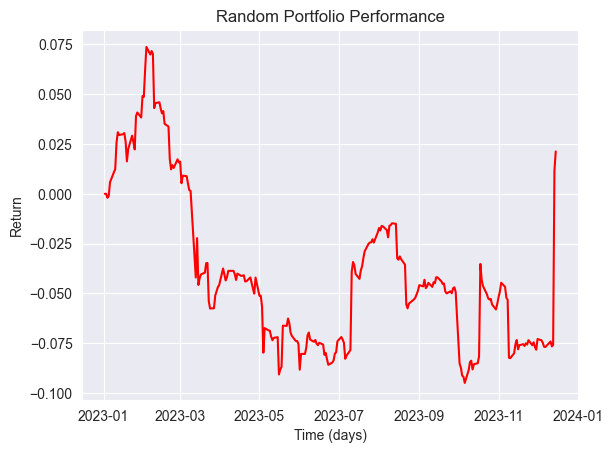

In [36]:
portfolio_performance(ran_port)

### Optimisation du portefeuille

In [22]:
def portfolio_opti(portfolio):
    # On sélectionne 10 actions au hasard
    actions = random.sample(symbols, 10)
    
    # On télécharge les données de prix journalier pour chacune des actions du portefeuille
    data = yf.download(actions, start='2023-01-01')['Adj Close']
    data.sort_index(inplace=True)
    
    # On convertit les prix journaliers des actions en rendements journaliers
    rendements = data.pct_change()
    
    # On calcule le rendement journalier moyen et la covariance des rendements journaliers
    rendements_moyens_journaliers = rendements.mean()
    matrice_covariance = rendements.cov()
    
    # On définit le nombre de simulations pour les pondérations aléatoires du portefeuille
    num_portefeuilles = 25000
    
    # On un tableau "résultats" pour stocker les résultats
    # Le nombre de lignes est de 3 (pour 'ret', 'stdev', 'sharpe') plus le nombre d'actions
    num_actions = len(actions)
    resultats = np.zeros((3 + num_actions, num_portefeuilles))
    
    # boucle sur le nombre de simulations
    for i in range(num_portefeuilles):
        # On sélectionne des pondérations aléatoires pour les actions du portefeuille
        pondérations = np.random.random(num_actions)
        # On rééquilibre les pondérations pour qu'elles s'additionnent à 1
        pondérations /= np.sum(pondérations)
        
        # On calcule le rendement et la volatilité du portefeuille
        rendement_portefeuille = np.sum(rendements_moyens_journaliers * pondérations) * 252
        écart_type_portefeuille = np.sqrt(np.dot(pondérations.T, np.dot(matrice_covariance, pondérations))) * np.sqrt(252)
        
        # On stocke les résultats dans le tableau des résultats
        resultats[0, i] = rendement_portefeuille
        resultats[1, i] = écart_type_portefeuille
        # On stocke le ratio de Sharpe (rendement / volatilité) - le taux sans risque est exclu pour simplifier
        resultats[2, i] = resultats[0, i] / resultats[1, i]
        # On parcourt le vecteur des pondérations et on ajoute les données au tableau des résultats
        for j in range(len(pondérations)):
            resultats[j + 3, i] = pondérations[j]
    
    # On convertit le tableau des résultats en DataFrame Pandas
    noms_colonnes = ['ret', 'stdev', 'sharpe'] + actions
    tableau_resultats = pd.DataFrame(resultats.T, columns=noms_colonnes)
    
    # On trouve la position du portefeuille avec le ratio de Sharpe le plus élevé
    portefeuille_max_sharpe = tableau_resultats.iloc[tableau_resultats['sharpe'].idxmax()]
    
    # On trouve la position du portefeuille avec la volatilité minimale
    portefeuille_min_vol = tableau_resultats.iloc[tableau_resultats['stdev'].idxmin()]
    
    # On crée un graphique de dispersion coloré par le ratio de Sharpe
    plt.scatter(tableau_resultats.stdev, tableau_resultats.ret, c=tableau_resultats.sharpe, cmap='RdYlBu')
    plt.xlabel('Volatilité')
    plt.ylabel('Rendements')
    plt.colorbar()
    
    # On dessine une étoile rouge pour mettre en évidence la position du portefeuille avec le ratio de Sharpe le plus élevé
    plt.scatter(portefeuille_max_sharpe['stdev'], portefeuille_max_sharpe['ret'], marker=(5, 1, 0), color='r', s=500)
    
    # On dessine une étoile verte pour mettre en évidence la position du portefeuille avec la volatilité minimale
    plt.scatter(portefeuille_min_vol['stdev'], portefeuille_min_vol['ret'], marker=(5, 1, 0), color='g', s=500)
    
    plt.show()

[*********************100%%**********************]  10 of 10 completed


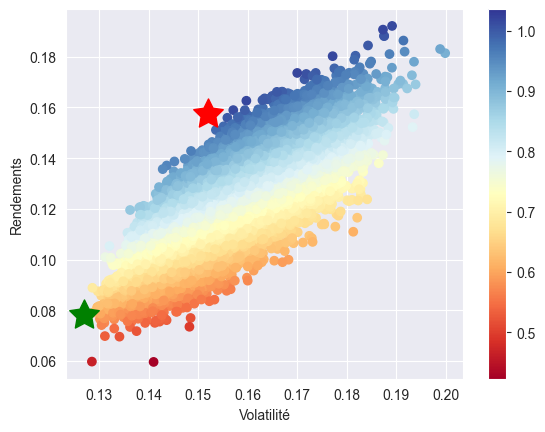

In [35]:
portfolio_opti(ran_port)